In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')
    return df

In [5]:
data = leer_datos("/content/drive/MyDrive/data_evaluacion.csv")
data.head(30)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


El data set trata sobre los empleados de alguna empresa en la cual es obtienen los datos de acontinuación hay algunas columnas que no tienen nombre sino datos numericos que se peuden interpretar como:
'39': Podría ser la edad de una persona.
'77516': Podría ser el número de horas trabajadas por semana o un ingreso anual.
'13': Podría ser el nivel de educación (por ejemplo, el número de años de educación).
'2174': Podría ser el código postal o alguna otra medida numérica.
'0': Podría ser un indicador binario (por ejemplo, si la persona ha sido contratada o no).
'40': Podría ser el número de horas trabajadas por semana o una edad máxima en una categoría.
39: Edad del individuo.
<=50k: sueldo

Datos:

State-gov: Tipo de empleador o sector de empleo.

Bachelors: Nivel educativo alcanzado.

Never-married: Estado civil del individuo.

Adm-clerical: Ocupación del individuo.

Not-in-family: Relación familiar (posiblemente el rol dentro de la familia).

White: Raza o etnicidad.

Male: Género del individuo.

United-States: País de residencia.

<=50K: Rango de ingresos (si es menor o mayor a $50K anuales).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print(data.describe())

                 39         77516            13          2174             0  \
count  48841.000000  4.884100e+04  48841.000000  48841.000000  48841.000000   
mean      38.643578  1.896664e+05     10.078029   1079.045208     87.504105   
std       13.710650  1.056039e+05      2.570965   7452.093700    403.008483   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.781470e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.376460e+05     12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06     16.000000  99999.000000   4356.000000   

                 40  
count  48841.000000  
mean      40.422391  
std       12.391571  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [8]:
# Seleccionar columnas numéricas
numerical_columns = ['39', '77516', '13', '2174', '0', '40']
data_numerical = data[numerical_columns]

# Normalizar los datos
scaler = StandardScaler()
data_numerical_normalized = scaler.fit_transform(data_numerical)

In [9]:
# Crear un DataFrame con los datos normalizados
data_numerical_normalized_df = pd.DataFrame(data_numerical_normalized, columns=numerical_columns)

# Renombrar las columnas del DataFrame normalizado
data_numerical_normalized_df.rename(columns={
    '39': 'Age',
    '77516': 'HoursPerWeek',
    '13': 'EducationLevel',
    '2174': 'PostalCode',
    '0': 'Indicator',
    '40': 'MaxHours'
}, inplace=True)

# Reemplazar las columnas originales por las normalizadas
data_normalized = data.copy()
data_normalized[list(data_numerical_normalized_df.columns)] = data_numerical_normalized_df

# Mostrar las primeras filas del DataFrame normalizado
data_normalized.head(90)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,Age,HoursPerWeek,EducationLevel,PostalCode,Indicator,MaxHours
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.828300,-1.007127,1.136539,-0.144799,-0.217129,-2.213010
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.046940,0.246012,-0.419313,-0.144799,-0.217129,-0.034087
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.047111,0.426642,-1.197239,-0.144799,-0.217129,-0.034087
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.776308,1.408510,1.136539,-0.144799,-0.217129,-0.034087
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,-0.119877,0.898798,1.525502,-0.144799,-0.217129,-0.034087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,0.755364,0.743991,-0.419313,-0.144799,-0.217129,-0.034087
86,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,50,United-States,<=50K,-0.411624,0.117275,1.525502,-0.144799,-0.217129,0.772921
87,30,Private,54334,9th,5,Never-married,Sales,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.630434,-1.281523,-1.975165,-0.144799,-0.217129,-0.034087
88,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,...,0,50,United-States,>50K,0.317743,2.094647,2.303428,-0.144799,-0.217129,0.772921


In [10]:
# Cambiar el nombre de la columna
data_normalized.rename(columns={'<=50K': 'salary'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
data_normalized.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,salary,Age,HoursPerWeek,EducationLevel,PostalCode,Indicator,MaxHours
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.828300,-1.007127,1.136539,-0.144799,-0.217129,-2.213010
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.046940,0.246012,-0.419313,-0.144799,-0.217129,-0.034087
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.047111,0.426642,-1.197239,-0.144799,-0.217129,-0.034087
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.776308,1.408510,1.136539,-0.144799,-0.217129,-0.034087
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,-0.119877,0.898798,1.525502,-0.144799,-0.217129,-0.034087


In [23]:
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   39              48841 non-null  int64  
 1   State-gov       48841 non-null  object 
 2   77516           48841 non-null  int64  
 3   Bachelors       48841 non-null  object 
 4   13              48841 non-null  int64  
 5   Never-married   48841 non-null  object 
 6   Adm-clerical    48841 non-null  object 
 7   Not-in-family   48841 non-null  object 
 8   White           48841 non-null  object 
 9   Male            48841 non-null  object 
 10  2174            48841 non-null  int64  
 11  0               48841 non-null  int64  
 12  40              48841 non-null  int64  
 13  United-States   48841 non-null  object 
 14  salary          48841 non-null  object 
 15  Age             48841 non-null  float64
 16  HoursPerWeek    48841 non-null  float64
 17  EducationLevel  48841 non-null 

# SVM

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [12]:
# Separar características y etiquetas
X = data_normalized.drop('salary', axis=1)
y = data_normalized['salary']

In [13]:
# Definir columnas categóricas y numéricas actualizadas
categorical_features = ['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'United-States']
numerical_features = ['Age', 'HoursPerWeek', 'EducationLevel', 'PostalCode', 'Indicator', 'MaxHours']

In [14]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [15]:
# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))  # Usa 'linear' o el kernel que prefieras
])

In [16]:
# Dividir en conjunto de entrenamiento y prueba
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')
# Evaluar el modelo
print(classification_report(y_test, y_pred))

Precisión: 0.85
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7464
        >50K       0.73      0.55      0.63      2305

    accuracy                           0.85      9769
   macro avg       0.80      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X_transformed = preprocessor.fit_transform(X)
# Convertir datos a formato denso
X_dense = X_transformed.toarray()

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

# Dividir datos transformados
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo con datos transformados
pipeline.named_steps['classifier'].fit(X_train_pca, y_train)

SVC(kernel='linear')

Tipo de datos de X: float64
Tipo de datos de y: object


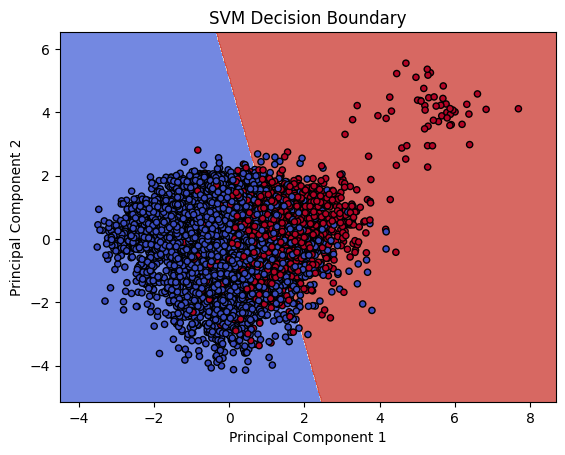

In [20]:
def plot_decision_boundary(X, y, model):
    # Verificar los tipos de datos
    print(f"Tipo de datos de X: {X.dtype}")
    print(f"Tipo de datos de y: {y.dtype}")

    # Crear una malla de puntos para graficar
    h = .02  # paso de malla en la gráfica
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Convertir las predicciones a números si es necesario
    if Z.dtype == 'object':
        Z = np.where(Z == '<=50K', 0, 1)  # Asumiendo que las etiquetas son <=50K y >50K
    if y.dtype == 'object':
        y = np.where(y == '<=50K', 0, 1)  # Asumiendo que las etiquetas son <=50K y >50K

    # Graficar la malla y los puntos
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Graficar la frontera de decisión
plot_decision_boundary(X_test_pca, y_test, pipeline.named_steps['classifier'])


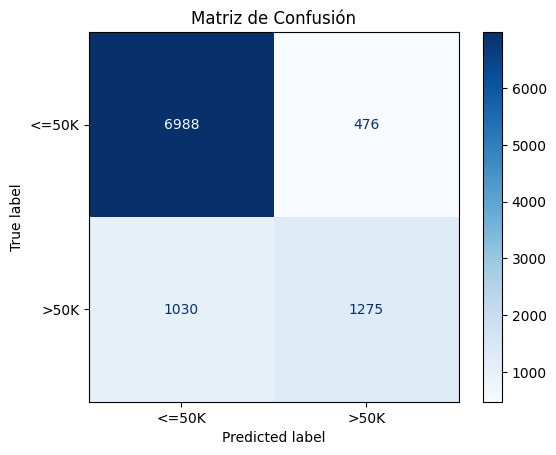

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Suponiendo que ya tienes tus predicciones
#y_pred = pipeline.named_steps['classifier'].predict(X_test_pca)
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [22]:
print(cm)

[[6988  476]
 [1030 1275]]
